In [88]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import date

In [90]:
TOP_DIR = r'/Users/bichama1/Documents/homework/stats'
GRAIN_IMPORTS_IN_DIR = r'grain_exports'
SOYBEAN_PRICE_IN_DIR = r'global_soybean_prices'

In [91]:
grain_exports_csvs = glob.glob(os.path.join(TOP_DIR, GRAIN_IMPORTS_IN_DIR, '*.csv'))
soybean_price_csv = os.path.join(TOP_DIR, SOYBEAN_PRICE_IN_DIR, 'PSOYBUSDM.csv')
new_orleans_prices_csv = os.path.join(TOP_DIR, SOYBEAN_PRICE_IN_DIR, 'NO_Port_Soybean_Prices.csv')
paranagua_prices_csv = os.path.join(TOP_DIR, SOYBEAN_PRICE_IN_DIR, 'PR_Port_Soybean_Prices.csv')

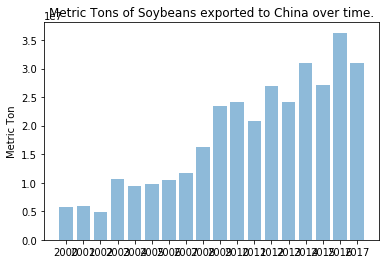

In [92]:
destination = 'CHINA MAIN'
grain = 'SOYBEANS'
exports_dataset = {}
for export_csv in grain_exports_csvs:
    year = int(os.path.basename(export_csv).replace('CY','').replace('.csv',''))
    data = pd.read_csv(export_csv)
    data = data[data['Grain'] == grain]
    data = data[data['Destination'] == destination]
    exports_dataset[year] = data
    
total_exports = []
years = sorted(exports_dataset.keys())
for year in years:
    total_exports.append(exports_dataset[year]['Metric Ton'].sum())

y_pos = np.arange(len(years))
plt.bar(y_pos, total_exports, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Metric Ton')
plt.title('Metric Tons of Soybeans exported to China over time.')
plt.show()

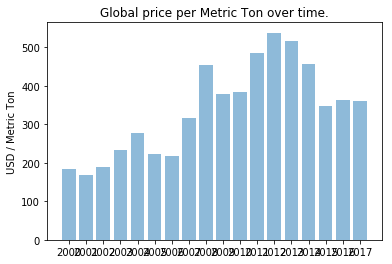

In [69]:
prices_dataset = pd.read_csv(soybean_price_csv)
prices_dataset['DATE'] = prices_dataset['DATE'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').date())

average_prices = []

for year in years:
    begin_date = date(year, 1, 1)
    end_date = date(year+1, 1, 1)
    prices_for_year = prices_dataset[(prices_dataset['DATE'] >= begin_date) & (prices_dataset['DATE'] < end_date)]
    average_price_for_year = prices_for_year['PSOYBUSDM'].mean()
    average_prices.append(average_price_for_year)
    

y_pos = np.arange(len(years))
plt.bar(y_pos, average_prices, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('USD / Metric Ton')
plt.title('Global price per Metric Ton over time.')
plt.show()

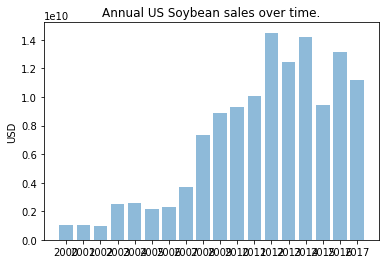

In [71]:
annual_sales = [price*tons for price,tons in zip(average_prices, total_exports)]

y_pos = np.arange(len(years))
plt.bar(y_pos, annual_sales, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('USD')
plt.title('Annual US Soybean sales over time.')
plt.show()

In [87]:
no_prices_dataset = pd.read_csv(new_orleans_prices_csv)
no_prices_dataset['DATE'] = no_prices_dataset['DATE'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').date())

pr_prices_dataset = pd.read_csv(paranagua_prices_csv)
pr_prices_dataset['DATE'] = pr_prices_dataset['DATE'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y').date())



,DATE,PRICE_60KILO,PRICE_BUSHEL
0,2006-03-13,12.96,5.878440
1,2006-03-14,12.91,5.855761
2,2006-03-15,13.00,5.896583
3,2006-03-16,12.78,5.796795
4,2006-03-17,12.68,5.751437
5,2006-03-20,12.73,5.774116
6,2006-03-21,12.67,5.746901
7,2006-03-22,12.94,5.869368
8,2006-03-23,12.87,5.837618
9,2006-03-24,12.96,5.878440


,DATE,PRICE_60KILO,PRICE_BUSHEL
0,2006-03-13,12.96,5.878440
1,2006-03-14,12.91,5.855761
2,2006-03-15,13.00,5.896583
3,2006-03-16,12.78,5.796795
4,2006-03-17,12.68,5.751437
5,2006-03-20,12.73,5.774116
6,2006-03-21,12.67,5.746901
7,2006-03-22,12.94,5.869368
8,2006-03-23,12.87,5.837618
9,2006-03-24,12.96,5.878440
